# Wikipedia Clusters
<br>
In this notebook we have done all the tasks required from the step 1,2 and 3 of the project. From scraping the data to analysis of the obtained clusters. We have used BeautifulSoup as library for scraping data, and sklearn as library for data analysis.

In [1]:
import urllib.request as ul
from bs4 import BeautifulSoup
from tqdm import tqdm
import pickle
import os
import numpy as np
from IPython.display import display, clear_output
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

We can start with scraping wikipedia pages. <br>
Initially we designed a crawler using the sequential approach, but in this way we noticed that it takes about 12 hours to finish the computation. So, we have implemented a **parallelized** version of this crawler that can complete this task in 1 hour, the respective code is in the file **crawler.py** . <br>

In the scraper.py file there are two function:

* **parse(line):** Is a parallelized function used for parsing wikipedia pages, in order to retrieve the respective categories. We used find(...) function of BeautifulSoup to identify the categories in the html schema, then we return a couple composed by (user_ID, list of category)

* **one_hot_encoding(set, size):** Is a function used to obtain an one hot vector for each user mapped with categories of his wikipedia pages.

## Categories reduction:
Wikipedia is a not structured source of information, so given a subcategory of one wikipedia page, if we try to find a root for that subcategory, this is an impossible task. <br>
Then, we have implemented an algorithm that reduce the number of category and retrieve the most significant categories for each page. <br>
In details, when we have retrieved all the categories for one wikipedia page, we split all the words of this categories, remove all the stopwords, and count the remains words. Then, for each wikipedia page we store the **3 most repeated words**. <br>
In this way we try to extract a contest from each Wikipedia page.

At the end of the execution of crawler.py, we create two python dictionary: categories and preferencies.

* **categories:** is a dictionary that has name of category (string) as key and unique id (integer) as value.

* **preferencies:** is a dictionary that has user_id (integer) as key and list of categories (list of strings) as value that contains all the categories associated to user's preferencies.

At the end of the crawling (done by crawler.py), we store this two dictionaries in two pickle files: **categories.pkl**, **preferencies.pkl**

At this point we perform the PCA algorithm to reduce dimension of our data in order to make our data visualizable on the plot.

In [2]:
f = pickle.load(open('preferencies_wiki_final.pkl', 'rb'))
dataset = np.array([f[user] for user in f])

In [4]:
pca = PCA(n_components=2).fit(dataset)
pca_2d = pca.transform(dataset)

In [4]:
pca_2d.shape

(58789, 2)

In [5]:
pca_2d[:20]

array([[-0.2527906 , -0.06948457],
       [-0.34559589, -0.12020253],
       [-0.28146307,  0.09834449],
       ...,
       [-0.26566972, -0.07716841],
       [ 0.82399842, -0.08819858],
       [-0.24238285, -0.07134737]])

Above the plot of PCA results, before that we try to find clusters:

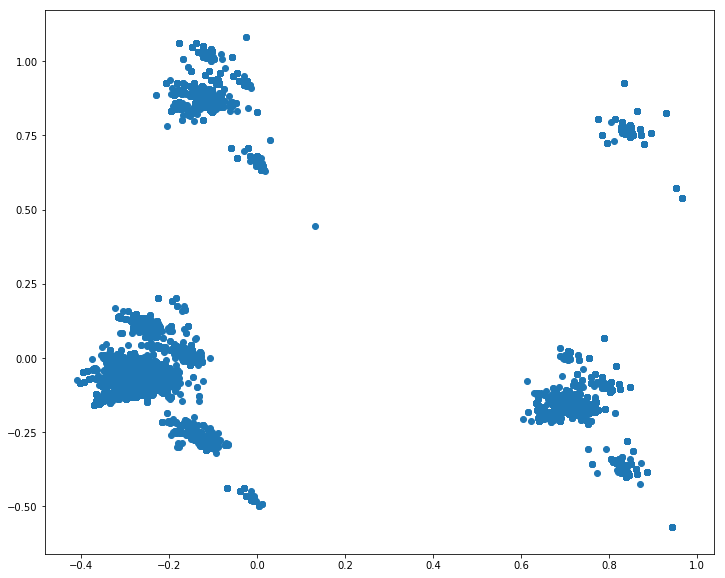

In [6]:
plt.figure(figsize=(12,10))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])
plt.show()

## Clusters Analysis
The PCA plot suggests us to try with 4 clusters, and this is the result obtained. <br>
At each cluster we have assigned one color, and we denote with **red X** the centroid of each cluster

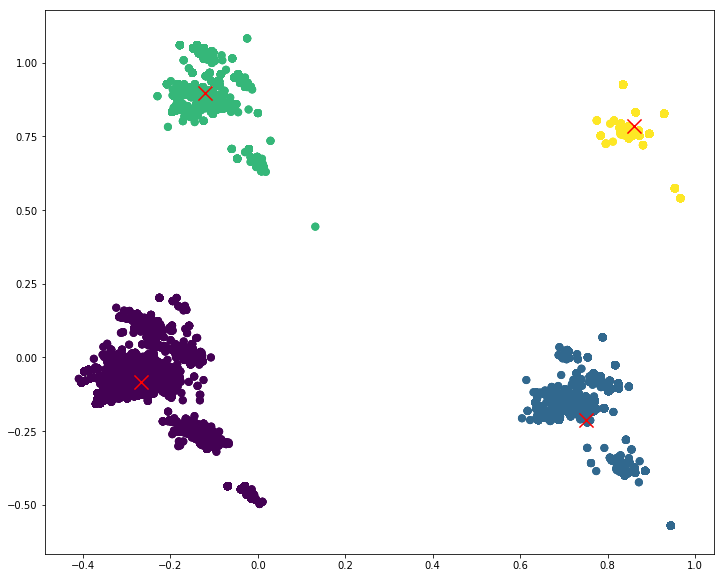

In [5]:
kmeans = KMeans(n_clusters=4).fit(pca_2d)
y_kmeans = kmeans.predict(pca_2d)
plt.figure(figsize=(12, 10))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y_kmeans, s=50)
centroids = kmeans.cluster_centers_
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y_kmeans, s=50);
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='x', c='red')
plt.show()

In order to evaluate the clusters we have choose to use **Silhouette score** as metrics. <br>
For each point $i$, first find the average distance $A_{i}$ between $i$ and all other points in the same cluster, that is a measure of cohesion. Then, find the average distance $B_{i}$ between $i$ and all points in the nearest cluster, that is a measure of separation from the closest other cluster. <br>
The silhouette coefficient for $s_{i}$ is defined as the difference between B and A divided by the greater of the two $max_{A,B}$. <br>
<br>

<br>
<br>
$s_{i} = \frac{B_{i}-A_{i}}{max_{A_{i},B_{i}}}$
<br>
<br>

Since the cost of computation for this score is very high because we have 58000 elements in our dataset, we can retrieve this score for cluster analysis with a sample size of 100:

In [4]:
pca = PCA(n_components=2).fit(dataset)
pca_2d = pca.transform(dataset)
kmeans = KMeans(n_clusters=4).fit(pca_2d)
y_kmeans = kmeans.predict(pca_2d)

n_clusters = 4
silhouette_avg = silhouette_score(pca_2d, y_kmeans, sample_size=100)

print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)


For n_clusters = 4 The average silhouette_score is : 0.9062060323202136
